# **Creación de data tabular de la señales fisiológicas obtenidas en los laboratorios**

In [1]:
#Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Seleccionamos estilo de ploteo
plt.style.use("ggplot")

In [3]:
def plotear(señal,lim1,lim2):
    plt.plot(señal)
    plt.xlim(lim1,lim2)

## Lectura de los datos

In [4]:
#Lectura de documento txt con tabulación (/t) como delimitador
array1 = np.genfromtxt("Lab4_Basal.txt", delimiter="\t")
array2 = np.genfromtxt("Lab4_PostEjercicio.txt", delimiter="\t")
array3 = np.genfromtxt("Lab4_Respiracion.txt", delimiter="\t")
array4 = np.genfromtxt("Lab4_RespiracionV2.txt", delimiter="\t")

In [5]:
#Nos quedamos con el dato del sensor
d_sensor1 = array1[:,-2]
d_sensor2 = array2[:,-2]
d_sensor3 = array3[:,-2]
d_sensor4 = array4[:,-2]

## Graficación de los datos

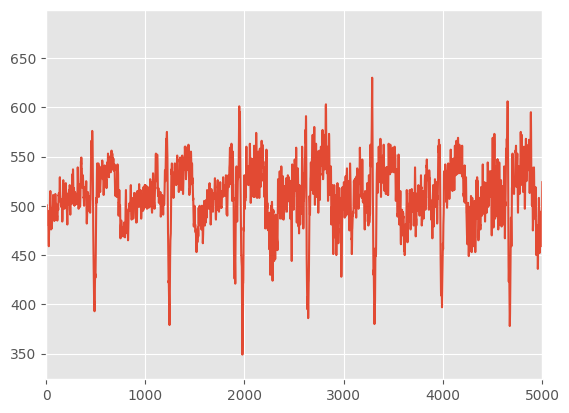

In [6]:
plotear(d_sensor1,0,5000)

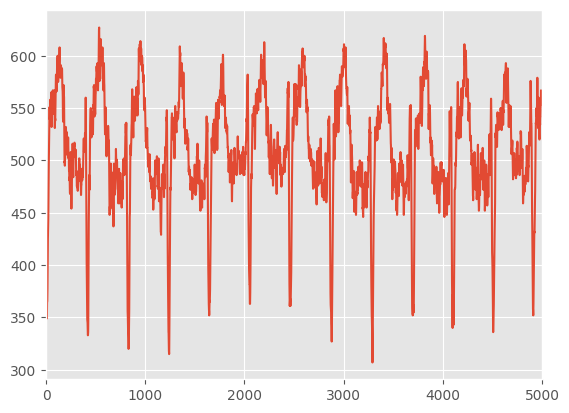

In [7]:
plotear(d_sensor2,0,5000)

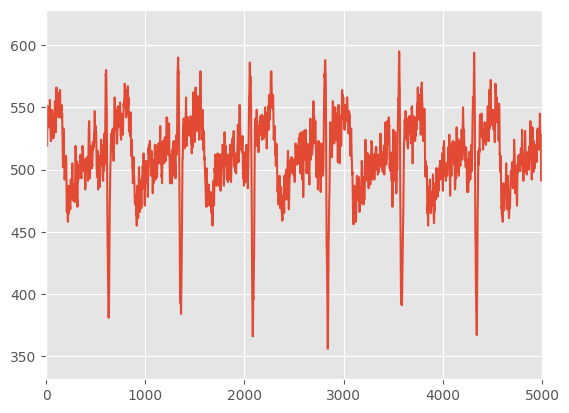

In [8]:
plotear(d_sensor3,0,5000)

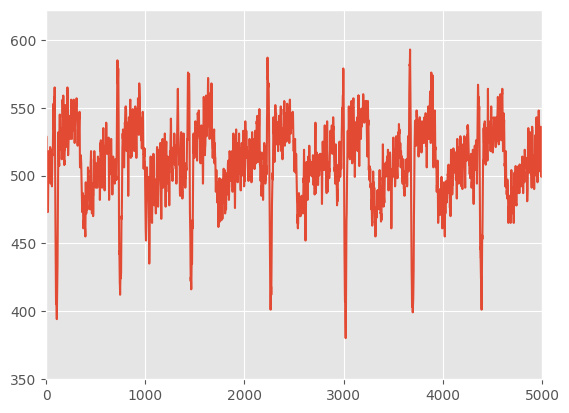

In [9]:
plotear(d_sensor4,0,5000)

## Especificar la Frecuencia de muestreo 

In [10]:
Fs = 1000 #Frecuencia de muestreo del dispositivo de adquisición
Ts=1/Fs
n1 = np.arange(0,d_sensor1.shape[0])  # t = n*Ts
t1 = n1*Ts

n2 = np.arange(0,d_sensor2.shape[0])  # t = n*Ts
t2 = n2*Ts

n3 = np.arange(0,d_sensor3.shape[0])  # t = n*Ts
t3 = n3*Ts

n4 = np.arange(0,d_sensor4.shape[0])  # t = n*Ts
t4 = n4*Ts

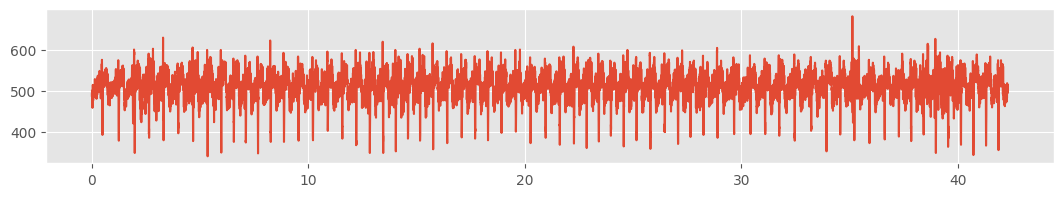

In [11]:
#Ploteamos la señal en el tiempo
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t1, d_sensor1)

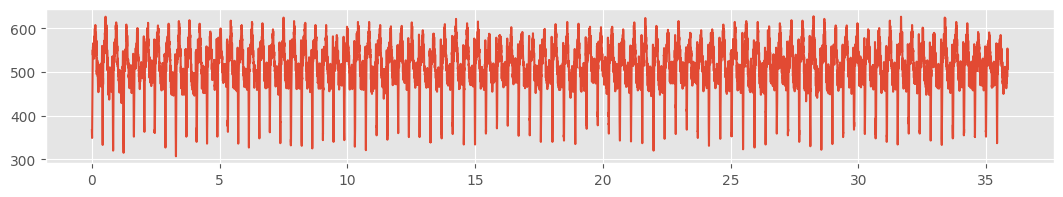

In [12]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t2, d_sensor2)

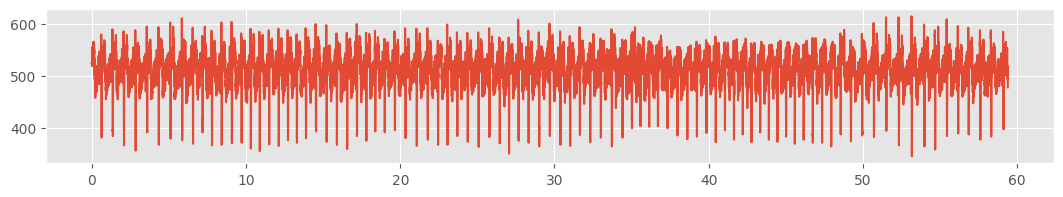

In [13]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t3, d_sensor3)

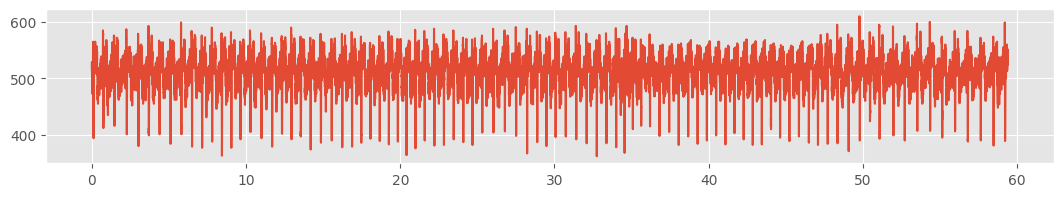

In [14]:
plt.figure(figsize=(13,2)) #Modificamos el tamaño de la gráfica
plt.plot(t4, d_sensor4)

## Pasando el array a pandas para trabajarlo como series de tiempo

In [15]:
# Pase de array para trabajar como series de tiempo
#Pasamos las observaciones a filas correspondientes a una variable t y d_sensor
st_sensor1 = np.concatenate((t1.reshape(-1,1),  d_sensor1.reshape(-1,1)), axis=1)
st_sensor2 = np.concatenate((t2.reshape(-1,1),  d_sensor2.reshape(-1,1)), axis=1)
st_sensor3 = np.concatenate((t3.reshape(-1,1),  d_sensor3.reshape(-1,1)), axis=1)
st_sensor4 = np.concatenate((t4.reshape(-1,1),  d_sensor4.reshape(-1,1)), axis=1)

In [16]:
#Creamos el data frame con las varibles t y d_sensor
df1 = pd.DataFrame(st_sensor1, columns=["t","d_sensor1"])
df2 = pd.DataFrame(st_sensor2, columns=["t","d_sensor2"])
df3 = pd.DataFrame(st_sensor3, columns=["t","d_sensor3"])
df4 = pd.DataFrame(st_sensor4, columns=["t","d_sensor4"])
#df4.head()

In [17]:
#Establecemos t como index 
df1 = df1.set_index("t")
df2 = df2.set_index("t")
df3 = df3.set_index("t")
df4 = df4.set_index("t")
#df2.head()

(0.0, 2.0)

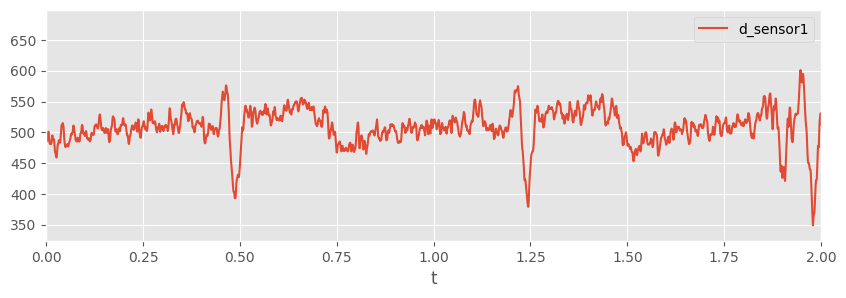

In [18]:
#Ploteamos la señal
df1.plot(figsize=(10,3))
plt.xlim(0,2)
#####plt.plot(df.index, df.loc[936])#######

(0.41, 0.84)

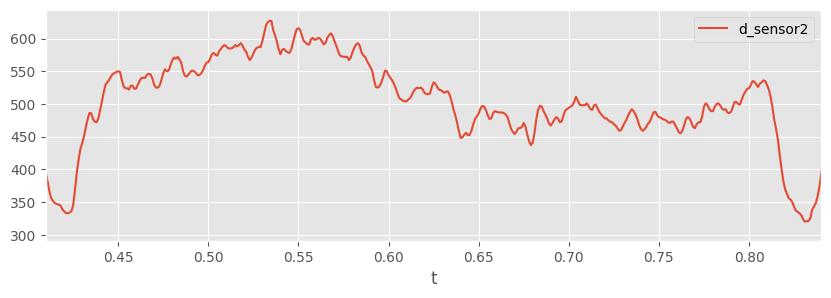

In [19]:
df2.plot(figsize=(10,3))
plt.xlim(0.41,0.84)

(0.0, 1.2)

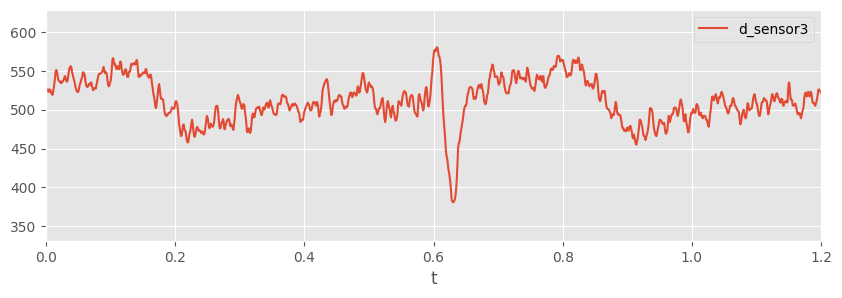

In [20]:
df3.plot(figsize=(10,3))
plt.xlim(0,1.2)

(1.0, 2.0)

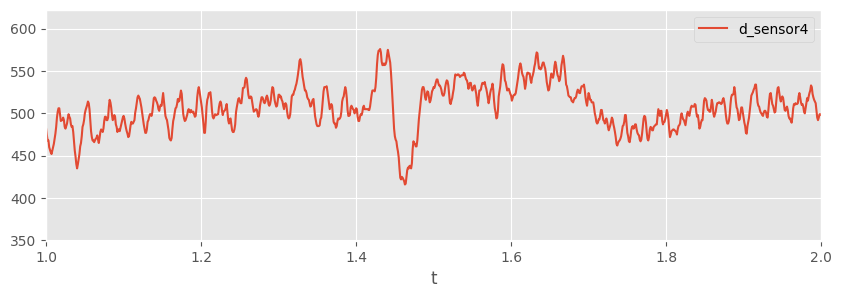

In [21]:
df4.plot(figsize=(10,3))
plt.xlim(1,2)

In [22]:
# Pase a data tabular con el estilo Sklearn
n1=df1.index.max()/1
s1=df1.shape[0]/60
print(n1,s1)

42.299 705.0


In [23]:
n2=df2.index.max()/1
s2=df2.shape[0]/35
print(n2,s2)

35.849000000000004 1024.2857142857142


In [24]:
n3=df3.index.max()/0.6
s3=df3.shape[0]/99
print(n3,s3)

98.99833333333333 600.0


In [25]:
n4=df4.index.max()/0.6
s4=df4.shape[0]/99
print(n4,s4)

98.99833333333333 600.0


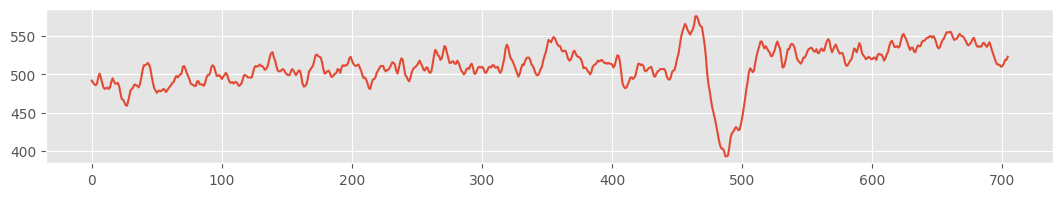

In [26]:
d_obs1 = df1[["d_sensor1"]].values.reshape(60,705)
plt.figure(figsize=(13,2))
plt.plot(d_obs1[0])


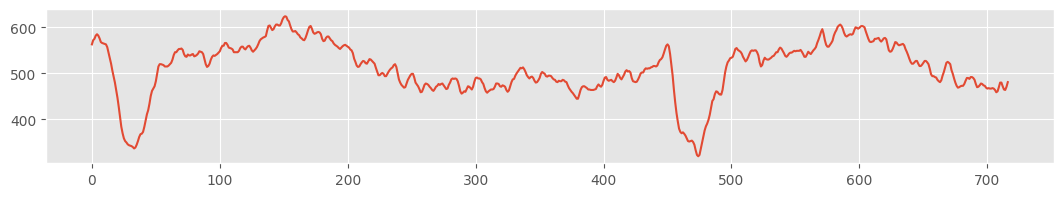

In [27]:
d_obs2 = df2[["d_sensor2"]].values.reshape(50,717)
plt.figure(figsize=(13,2))
plt.plot(d_obs2[30])

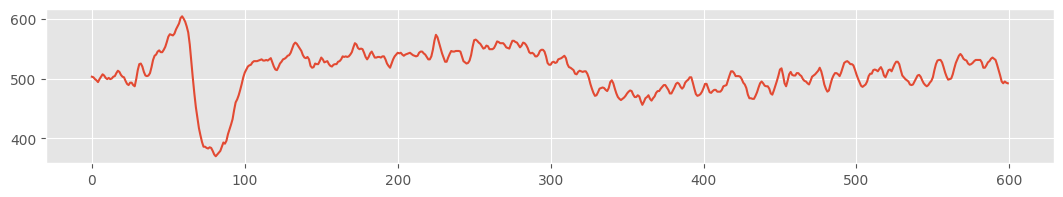

In [28]:
d_obs3 = df3[["d_sensor3"]].values.reshape(99,600)
plt.figure(figsize=(13,2))
plt.plot(d_obs3[15])

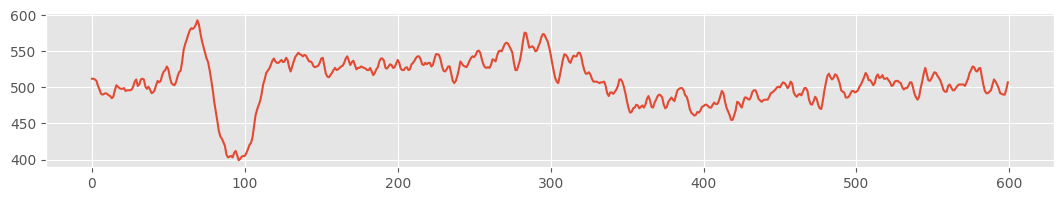

In [29]:
d_obs4 = df4[["d_sensor4"]].values.reshape(99,600)
plt.figure(figsize=(13,2))
plt.plot(d_obs4[6])

## Descripción de categoria de los ejercicios realizado en la clase de ECG

| Descripción | Categoria |
|----------|----------|
| Basal    | 1   |
| Post-Ejercicio    | 2   |
| Respiracion   | 3   | 
| RespiracionV2   | 4   | 



In [31]:
ecg={"1":d_obs1,"2":d_obs2,"3":d_obs3,"4":d_obs4}
ecg


{'1': array([[492., 489., 487., ..., 519., 519., 523.],
        [520., 519., 519., ..., 547., 540., 529.],
        [527., 530., 535., ..., 529., 537., 545.],
        ...,
        [543., 537., 529., ..., 545., 543., 545.],
        [546., 546., 543., ..., 483., 485., 490.],
        [492., 487., 482., ..., 502., 504., 507.]]),
 '2': array([[367., 363., 356., ..., 498., 499., 493.],
        [488., 484., 481., ..., 519., 521., 515.],
        [509., 504., 495., ..., 569., 577., 577.],
        ...,
        [375., 379., 372., ..., 480., 485., 492.],
        [503., 502., 497., ..., 562., 574., 585.],
        [584., 575., 567., ..., 516., 512., 508.]]),
 '3': array([[524., 523., 526., ..., 541., 548., 561.],
        [570., 576., 577., ..., 526., 524., 523.],
        [523., 520., 515., ..., 517., 525., 530.],
        ...,
        [547., 527., 507., ..., 518., 520., 528.],
        [536., 540., 534., ..., 516., 515., 514.],
        [514., 511., 508., ..., 496., 490., 478.]]),
 '4': array([[516., 52